This notebook is part of the course content of fastai's deep learning MOOC (v-3).

## Backprop for Linear Regression with PyTorch

In [1]:
%matplotlib inline
from fastai import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [2]:
n=100

In [3]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.9532,  1.0000],
        [-0.3517,  1.0000],
        [ 0.7797,  1.0000],
        [-0.2529,  1.0000],
        [-0.1627,  1.0000]])

In [4]:
a = tensor(-3.,4.); a

tensor([-3.,  4.])

In [5]:
y = x@a + torch.rand(n)
# y = x@a

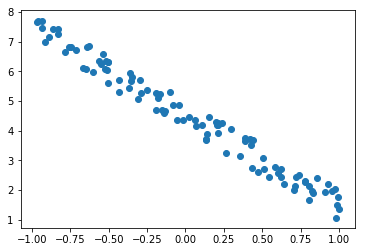

In [6]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [7]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (3.,1.)` then we can compute `y_hat` which is our *prediction* and then compute our error.

Choosing values for `a` that are almost totally opposite to the correct values.

In [18]:
a = tensor(3.,1.)

In [19]:
y_hat = x@a
mse(y_hat, y)

tensor(23.8984)

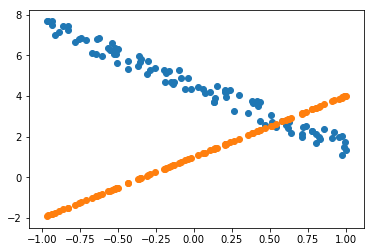

In [30]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [27]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-2.8739,  4.5374], requires_grad=True)

In [28]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [29]:
lr = 1e-1
for t in range(100): update()

tensor(0.0980, grad_fn=<MeanBackward1>)
tensor(0.0907, grad_fn=<MeanBackward1>)
tensor(0.0890, grad_fn=<MeanBackward1>)
tensor(0.0885, grad_fn=<MeanBackward1>)
tensor(0.0884, grad_fn=<MeanBackward1>)
tensor(0.0884, grad_fn=<MeanBackward1>)
tensor(0.0884, grad_fn=<MeanBackward1>)
tensor(0.0884, grad_fn=<MeanBackward1>)
tensor(0.0884, grad_fn=<MeanBackward1>)
tensor(0.0884, grad_fn=<MeanBackward1>)


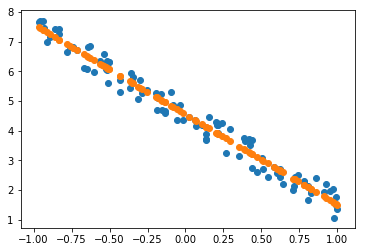

In [14]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [15]:
from matplotlib import animation, rc
rc('animation', html='html5')

You'll need to uncomment the following to install the necessary plugin the first time you run this:

In [ ]:
#! sudo add-apt-repository ppa:mc3man/trusty-media  
#! sudo apt-get update  
#! sudo apt-get install ffmpeg  
#! 1sudo apt-get install frei0r-plugins 

In [26]:
a = nn.Parameter(tensor(3.,1.))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 50), interval=20)